<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/DecisionTress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [73]:
#!ls

In [74]:
df = pd.read_csv('penguins_size.csv')
df.tail()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [75]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [76]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [77]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [78]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [79]:
df = df.dropna()

In [80]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [81]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [82]:
df.at[336, 'sex'] = 'FEMALE'

In [83]:
df['sex'].value_counts()

MALE      168
FEMALE    166
Name: sex, dtype: int64

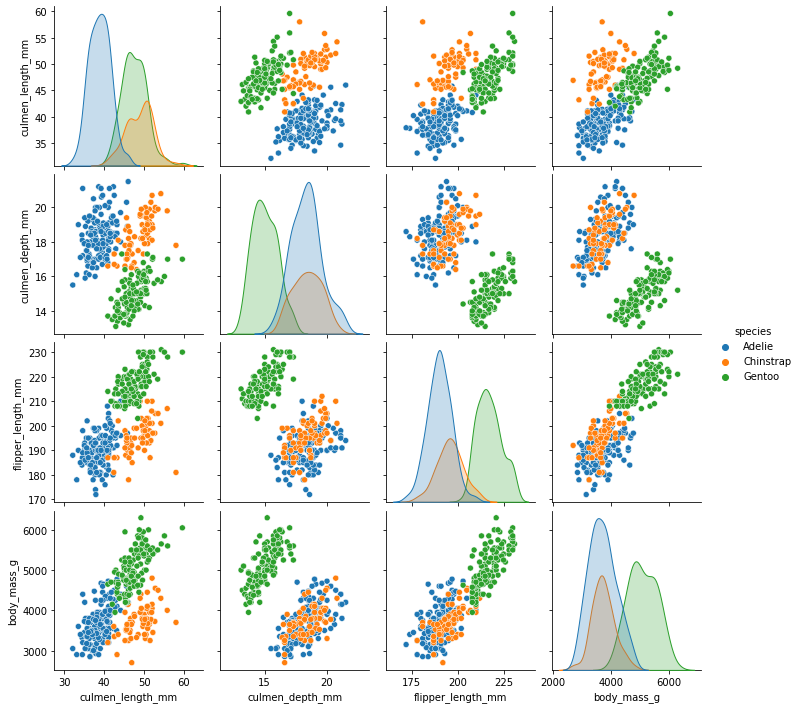

In [84]:
sns.pairplot(df, hue='species')

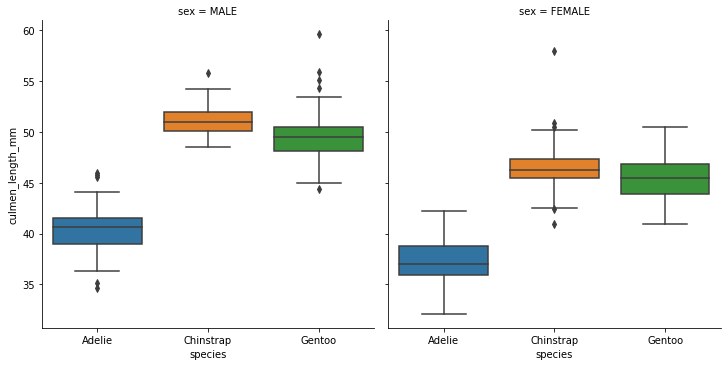

In [85]:
sns.catplot(x ='species', y = 'culmen_length_mm', data =df, kind ='box', col ='sex')

In [86]:
X = pd.get_dummies(df.drop('species', axis =1), drop_first = True)
y = df['species']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model = DecisionTreeClassifier()

In [91]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
base_preds = model.predict(X_test)
#base_preds

In [93]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [94]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



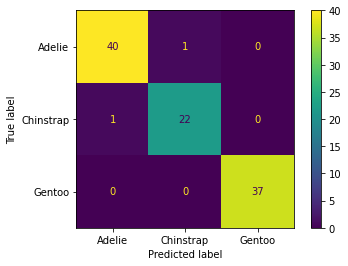

In [95]:
plot_confusion_matrix(model, X_test, y_test)

In [96]:
model.feature_importances_

array([0.32591819, 0.05221421, 0.54282921, 0.01085298, 0.0681854 ,
       0.        , 0.        ])

In [98]:
pd.DataFrame(index = X.columns,data = model.feature_importances_, columns =['Feature Importane']).sort_values('Feature Importane')

,Feature Importane
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.010853
culmen_depth_mm,0.052214
island_Dream,0.068185
culmen_length_mm,0.325918
flipper_length_mm,0.542829


In [100]:
from sklearn.tree import plot_tree

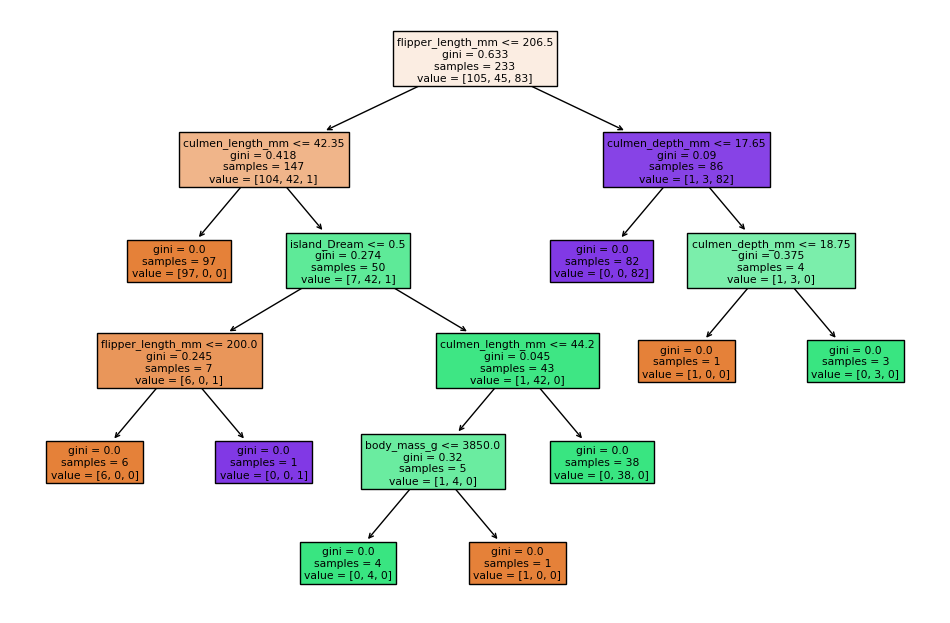

In [105]:
plt.figure(figsize=(12,8), dpi=100)
plot_tree(model, feature_names=X.columns, filled= True);

In [106]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=100)
    plot_tree(model, feature_names=X.columns, filled= True);

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





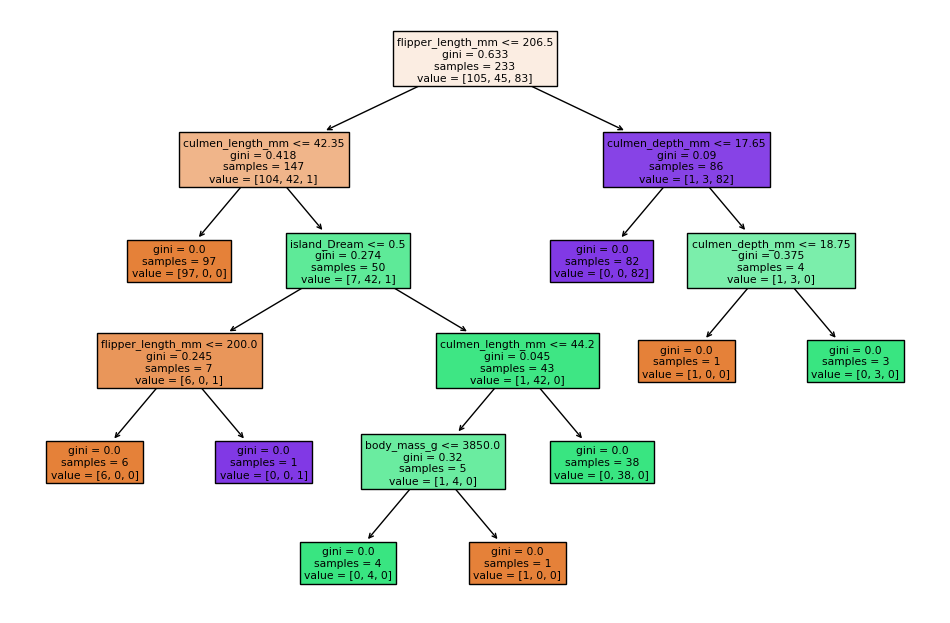

In [107]:
report_model(model)

In [108]:
pruned_tree = DecisionTreeClassifier(max_depth= 2)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





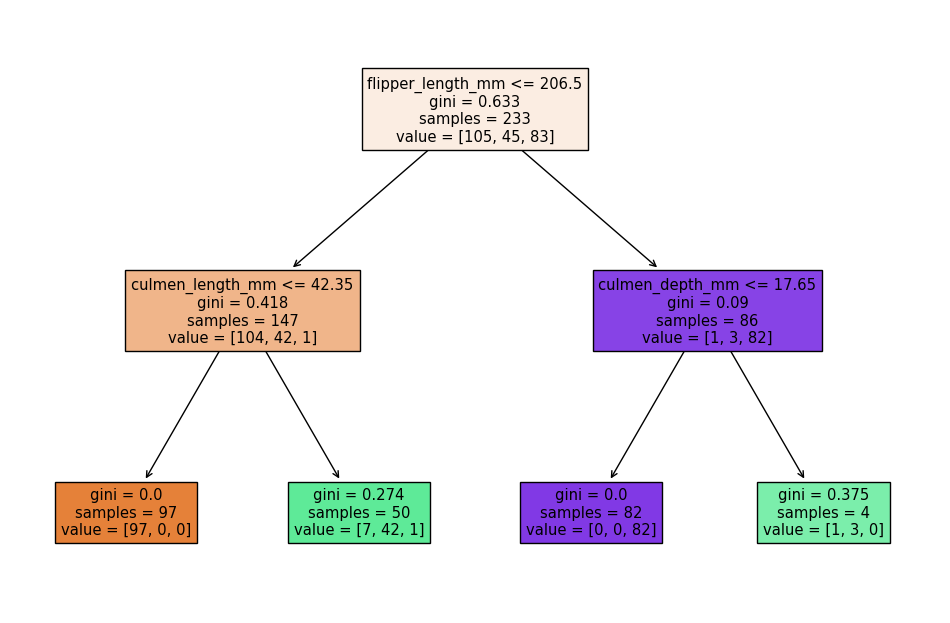

In [109]:
report_model(pruned_tree)

In [110]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [111]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





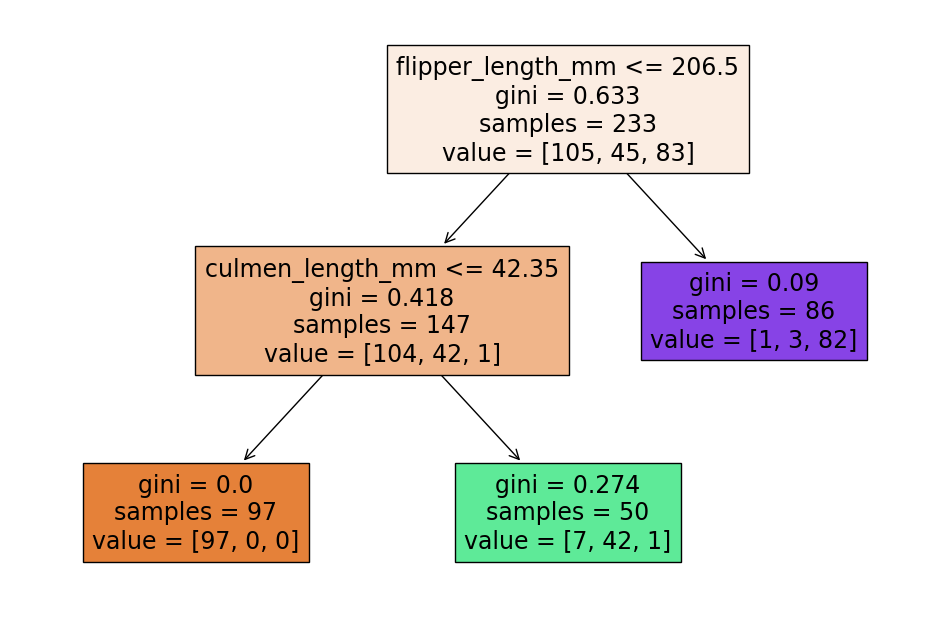

In [112]:
report_model(max_leaf_tree)

In [115]:
entropy_tree = DecisionTreeClassifier(criterion= 'entropy')

In [116]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





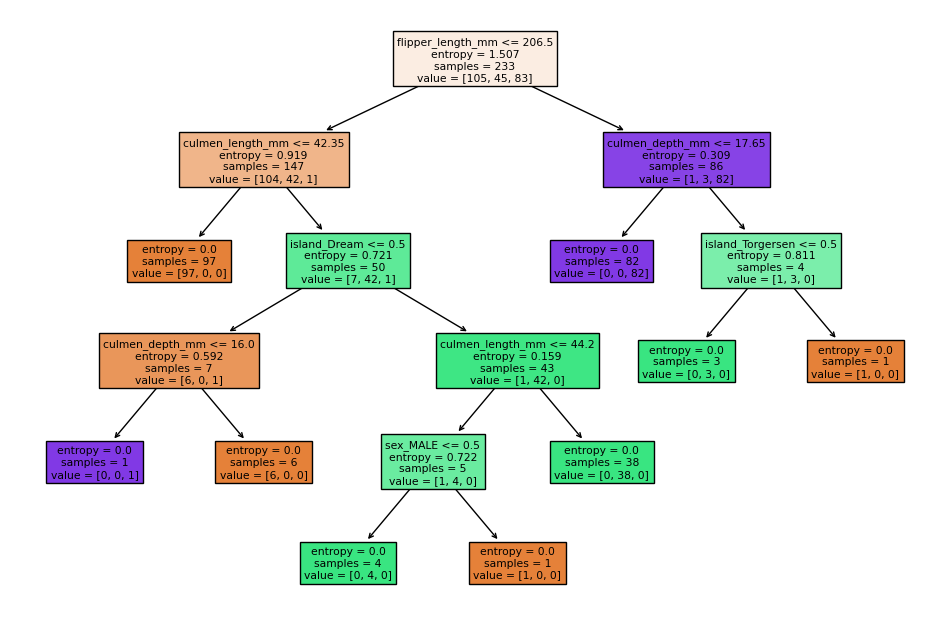

In [117]:
report_model(entropy_tree)